A la Carte Kernel Experiments
=============================

A few tests of the Fast Food based kernels discussed in the paper "A la Carte - Learning Fast Kernels". The aim of this notebook is to just visualise the Gaussian spectral mixture kernels with differen mean and lengthscale parameters.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as pl
pl.style.use('ggplot')
from itertools import chain

from revrand.basis_functions import FastFoodGM


In [2]:
# Settings
N = 1000
D = 10  # Kernel dimension
nbases = 500
rbf_lenscale = 1
means = [0, -0.5, 0.5]  # Gaussian spectral mixture means
lenscales = [1, 1, 1]  # Gaussian spectral mixture length scales
inrange = 4

# Data
x = np.zeros((N, D))
y = np.tile(np.linspace(-inrange, inrange, N), (D, 1)).T


In [3]:
# Kernel functions

def dist(power=2):
    return (np.abs((x - y)**power)).sum(axis=1)

# RBF
def kern_rbf():
    return np.exp(- dist() / (2 * rbf_lenscale**2))

k_rbf = kern_rbf()


In [4]:
ff_gm = FastFoodGM(Xdim=D, nbases=nbases)
for _ in range(len(means) - 1):
    ff_gm += FastFoodGM(Xdim=D, nbases=nbases)

meansD = [np.ones(D) * m for m in means]
lensD = [np.ones(D) * l for l in lenscales]
params = list(chain(*zip(meansD, lensD)))
    
def GMbasis2kern():
    weights = 1. / len(means)  # This is usually handled by the regressor weights
    return (weights * ff_gm.transform(x, *params) * ff_gm.transform(y, *params)).sum(axis=1)

f_gm = GMbasis2kern()


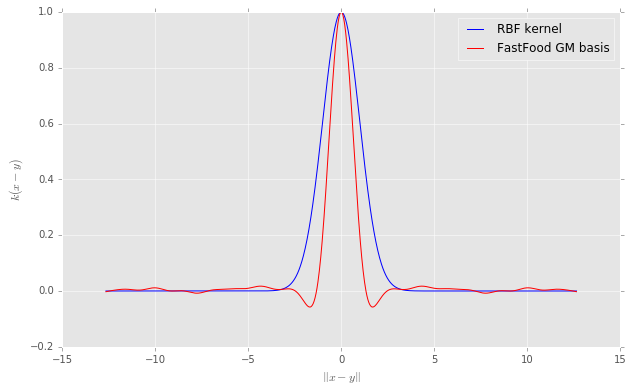

In [5]:
# Plot the kernel functions
distfrom00 = np.sign(y[:, 0]) * np.sqrt(dist(power=2))
def plotkern(k1, k2, k1_label=None, k2_label=None):
    pl.figure(figsize=(10, 6))
    pl.plot(distfrom00, k1, 'b', label=k1_label)
    pl.plot(distfrom00, k2, 'r', label=k2_label)
    pl.grid(True)
    pl.xlabel('$\| x - y \|$')
    pl.ylabel('$k(x - y)$')
    pl.legend()
    pl.show()

plotkern(k_rbf, f_gm, 'RBF kernel', 'FastFood GM basis')
